# iBF | JUMP LVL2 DVs Project | Factors: Sm+PCN | Test 1 | Date: 24.09.2022
author: Camillo Moschner

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
from random import randint
from ipywidgets import interact 

# Function Defintions

In [2]:
def divide_chunks(l, n):
    """Break a list into chunks of size N in Python (https://www.geeksforgeeks.org/break-list-chunks-size-n-python/) 
    """
    result_l = []
    for i in range(0, len(l), n):
        result_l.append(l[i:i + n])
    return result_l

def create_color_list(number_needed):
    color_list = []
    for i in range(number_needed):
        color_list.append('#%06X' % randint(0, 0xFFFFFF))
    return color_list

## Load Plate Data

In [3]:
FI_gain800_df = pd.read_csv(f"DATA{os.path.sep}220924_cm967_protocol1sfGFP.csv",index_col=0)
OD600_df = pd.read_csv(f"DATA{os.path.sep}220924_cm967_protocol2_OD600.csv",index_col=0)
OD900_df = pd.read_csv(f"DATA{os.path.sep}220924_cm967_protocol3_OD900.csv",index_col=0)

In [4]:
empty_well_list = []

In [5]:
FI_gain800_df.index = FI_gain800_df.index/60
OD600_df.index = OD600_df.index/60
OD900_df.index = OD900_df.index/60
# remove empty wells
FI_gain800_df.drop(columns=empty_well_list,inplace=True)
OD600_df.drop(columns=empty_well_list,inplace=True)
OD900_df.drop(columns=empty_well_list,inplace=True)

## Load Plate Encryption

In [17]:
plate_decryption_df = pd.read_csv(f"experimental_plan{os.path.sep}220924_decryption_spreadsheet.csv",index_col=0)
plate_layout_df = pd.read_csv(f"experimental_plan{os.path.sep}220924_plate_layout.csv",index_col=0)

In [7]:
standard_mpl_colors = ['black', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red']
# plate_decryption_df.samples = plate_decryption_df.samples.apply(lambda x: 'NCC' if x=='NTC' else x)
# plate_decryption_df.samples = plate_decryption_df.samples.apply(lambda x: 'NC' if x=='LVL2_NTC' else x)

In [19]:
plate_decryption_df = plate_decryption_df.loc[plate_decryption_df.samples.isin(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
       'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'])]

In [27]:
type(plate_decryption_df.abx_c.iloc[0]) #.to_csv(f"experimental_plan{os.path.sep}220924_decryption_spreadsheet.csv")#,index_col=0)

int

In [21]:
# remove empty wells
plate_decryption_df = plate_decryption_df.T.drop(columns=empty_well_list).T

In [28]:
# plate_decryption_df['abx_c'] = plate_decryption_df['abx_c'].apply(lambda x: int(x[:-2]))
# split data by ammonium sulfate concentrations
data_by_am_c_dict = {}
for conc in plate_decryption_df['abx_c'].unique():
    data_by_am_c_dict[conc] = plate_decryption_df.loc[plate_decryption_df['abx_c']==conc]
# split data by plasmid
# data_by_am_c_dict = {}
# for plasmid in plate_decryption_df['plasmid'].unique():
#     data_by_am_c_dict[conc] = plate_decryption_df.loc[plate_decryption_df['plasmid']==plasmid]

In [29]:
color_list = ['black', 'tab:blue', 'tab:orange', 'tab:green', 'purple', 'tab:red']  #create_color_list(len(plate_decryption_df.samples.unique()))

## Plotting Growth

In [30]:
plate_decryption_df['abx_c'].unique()
data_by_am_c_dict.keys()

dict_keys([0, 100, 25, 50, 75])

<AxesSubplot: >

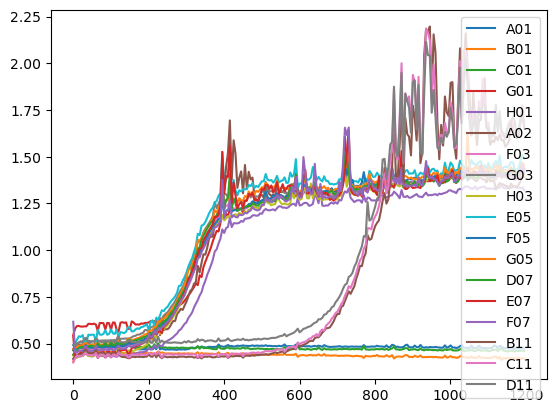

In [31]:
OD600_df [ data_by_am_c_dict[0].index ].plot()

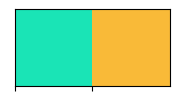

In [45]:
# import seaborn as sns

# Create the palette using the viridis colormap
viridis_palette = sns.color_palette('turbo', n_colors=2)

# Display the palette
sns.palplot(viridis_palette)


In [32]:
plate_decryption_df.samples.unique()

array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
       'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object)

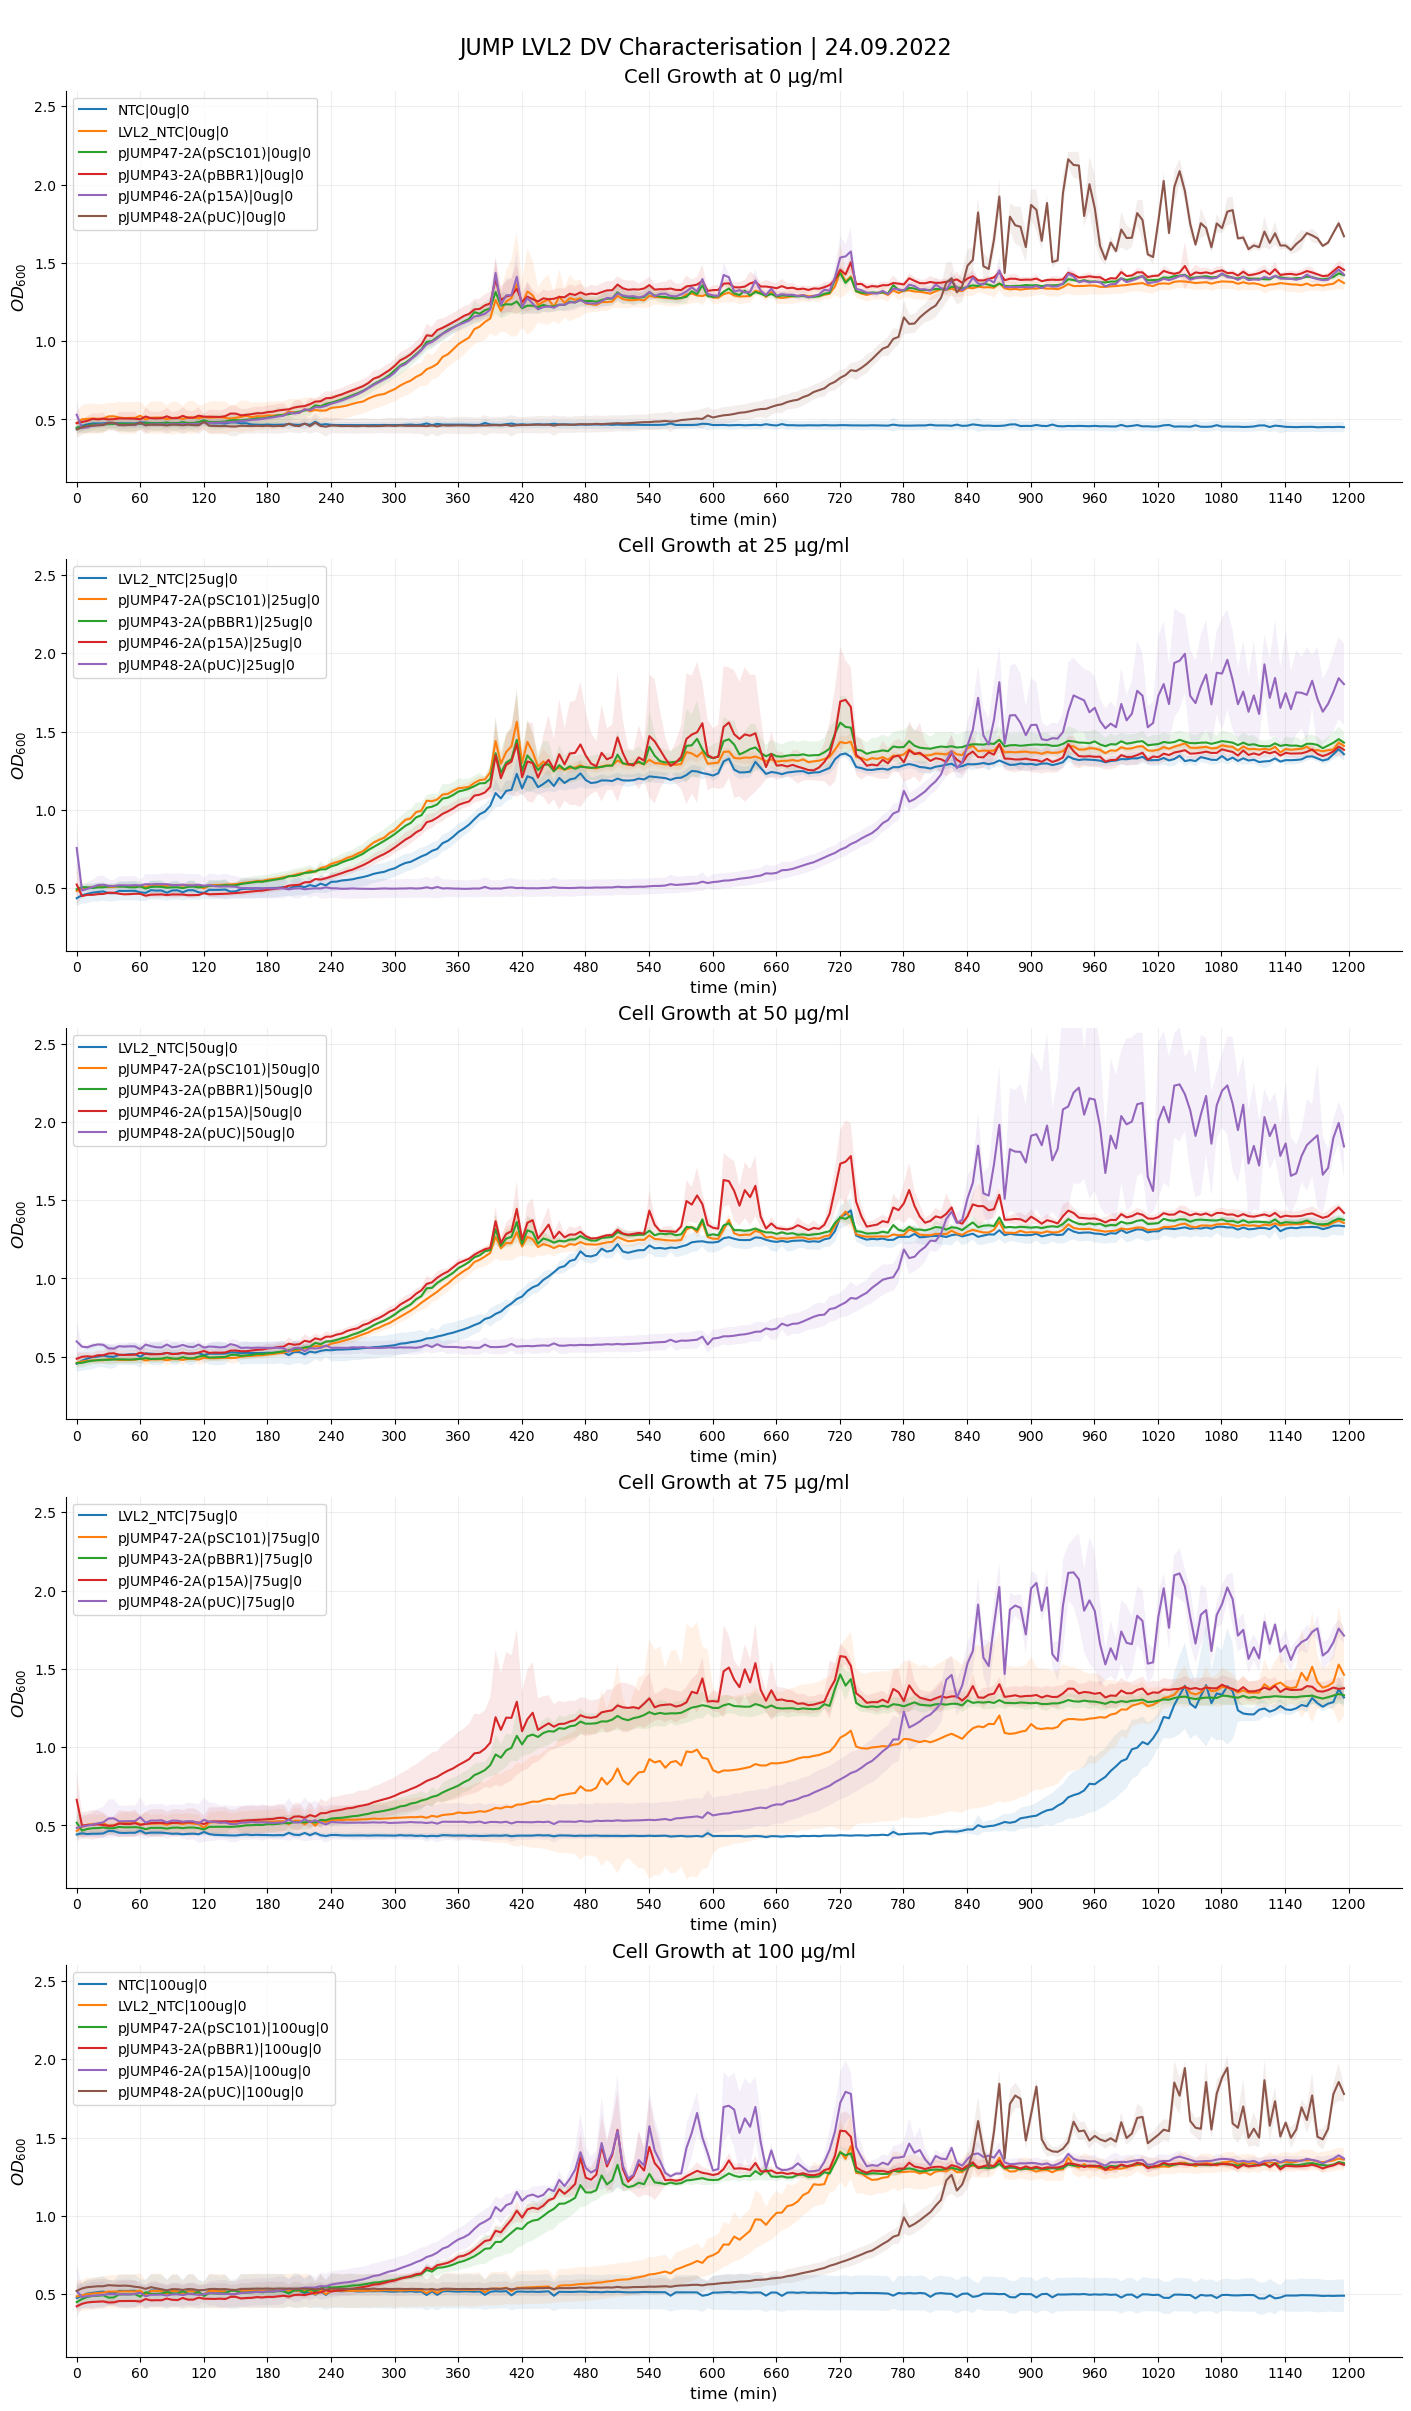

In [34]:
fig = plt.figure(figsize=(14,24), constrained_layout=True)
gs = gridspec.GridSpec(5,1, figure=fig)
plt.suptitle(f"\nJUMP LVL2 DV Characterisation | 24.09.2022",size=16)
plot_row = 0

test_df = OD600_df
for conc in sorted(plate_decryption_df['abx_c'].unique()):
    ax1= fig.add_subplot(gs[plot_row,0])
    
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
        replicate_no = 3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'ID']}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

        ax1.set_title(f"Cell Growth at {conc} µg/ml",size=14)
        ax1.set_ylabel("$OD_{600}$",size=12)
        ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_ylim([0.1,2.6])
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)
    
    plot_row+=1
plt.show()
#plt.savefig("220924_iBF_sfGFPcharact_test1_amm_conc_growth_curves.png", dpi=300)

In [ ]:
fig = plt.figure(figsize=(12,8), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
plt.suptitle(f"\nJUMP LVL2 DV Characterisation | 24.09.2022",size=16)
ax1= fig.add_subplot(gs[0,0])
test_df = OD600_df
for run_replicate_wells in divide_chunks( data_by_am_c_dict[0].index, 3 ):
    replicate_no = 3
    x= test_df[run_replicate_wells].index
    y= test_df[run_replicate_wells].mean(axis=1)
    variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
    # 1- average line plot
    sns.lineplot(ax = ax1,
                 data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'ID']}") # 1.95 * np.std(y)/np.sqrt(len(x))
    # 2- confidence interval
    ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
    ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

    ax1.set_title(f"Cell Growth at {0} mM {2} ug/mL (Streptomycin)",size=14)
    ax1.set_ylabel("$OD_{600}$",size=12)
    ax1.set_xlabel(f"time (min)",size=12)
    plt.xticks(np.arange(min(x), max(x)+60, 60.0))
    #ax1.set_ylim([0.1,2.6])
    ax1.set_xlim([-10,1250])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    plt.grid(True,alpha=0.2)

In [ ]:
from scipy.optimize import curve_fit
# import sympy as sy

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

def func(x, a, b, c): # Hill sigmoidal equation from zunzun.com
    return  a * np.power(x, b) / (np.power(c, b) + np.power(x, b))

def sigmoid_function(xdata, x0, k):
    y = np.exp(-k*(xdata-x0)) / (1 + np.exp(-k*(xdata-x0)))
    return y

def sigmoid_derivative(x, x0, k):
    f = np.exp(-k*(x-x0))
    return -k / f

In [ ]:
test_df = OD600_df
for run_replicate_wells in divide_chunks( data_by_am_c_dict[0].index, 3 ):
    test_df = OD600_df[['C09', 'D09', 'E09']]#['D07', 'E07', 'F07']]#.plot()
    ydata = test_df.mean(axis=1).to_list()
    xdata = test_df.mean(axis=1).index
    p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid, xdata, ydata, p0, method='lm')

In [ ]:
fig = plt.figure(figsize=(12,8), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
plt.suptitle(f"\nJUMP LVL2 DV Characterisation | 24.09.2022",size=16)
ax1= fig.add_subplot(gs[0,0])

test_df = OD600_df
popt_list = []
midpoint_list = []

conc = 25
for idx, run_replicate_wells in enumerate(divide_chunks( data_by_am_c_dict[conc].index, 3 )[:]):
    replicate_no = 3
    xdata= test_df[run_replicate_wells].index
    ydata= test_df[run_replicate_wells].mean(axis=1)
    variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
    # 1- average line plot
    sns.lineplot(ax = ax1,
                 data = ydata, color=color_list[idx])#, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'ID']}") # 1.95 * np.std(y)/np.sqrt(len(x))
    # 2- confidence interval
    ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
    ax1.fill_between(xdata, (ydata-ci), (ydata+ci), color=color_list[idx],alpha=.1)
        
    #test_df = OD600_df[run_replicate_wells]#['D07', 'E07', 'F07']]#.plot()
    #ydata = test_df.mean(axis=1).to_list()
    p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid, xdata, ydata, p0, method='lm')
    
    initial_guess = [popt[1], 1]  # (x0, k): at x0, the sigmoid reaches 50%, k is slope related
    popt_new, pcov_new = curve_fit(sigmoid_function, xdata, ydata, p0=initial_guess)
    print(sigmoid_derivative(popt[1], *popt_new))

    midpoint_list.append(popt[1])
    popt_list.append(popt)
    #plt.plot(xdata, ydata)
    plt.plot(xdata, sigmoid(xdata, *popt), label=f"{plate_decryption_df.loc[run_replicate_wells[0],'ID']} - {round(popt[1],1)}")
    
    ax1.set_title(f"Cell Growth at {conc} ug/mL (Streptomycin)",size=14)
    ax1.set_ylabel("$OD_{600}$",size=12)
    ax1.set_xlabel(f"time (min)",size=12)
    plt.xticks(np.arange(min(x), max(x)+60, 60.0))
    #ax1.set_ylim([0.1,2.6])
    ax1.set_xlim([-10,1250])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    plt.grid(True,alpha=0.2)
    plt.legend()

In [ ]:
popt[0]
ydata.max()-ydata.min()

In [ ]:
[x[0]+x[3] for x in popt_list]

In [ ]:
popt[1]

In [ ]:
plt.plot(xdata, ydata)
plt.plot(xdata, sigmoid(xdata, *popt))

## Plotting sfGFP Intensities

In [ ]:
FI_gain800_df[run_replicate_wells].var(axis=1)
plate_decryption_df

In [ ]:
fig = plt.figure(figsize=(14,24), constrained_layout=True)
gs = gridspec.GridSpec(6,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df = FI_gain800_df
for conc in plate_decryption_df['abx_c'].unique():
    ax1= fig.add_subplot(gs[plot_row,0])
    
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
        replicate_no=3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        if plate_decryption_df.loc[run_replicate_wells[0],'name'] !='none':
            sns.lineplot(ax = ax1,
                         data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'plasmid']}")
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no) # 1.95 * np.std(y)/np.sqrt(len(x))
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

        ax1.set_title(f"sfGFP Intensities at {conc} µg/ml",size=14)
        ax1.set_ylabel("sfGFP (a.u.)",size=12)
        ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+1, 60.0))
        ax1.set_ylim([0,38_000])
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)

    plot_row+=1
#plt.savefig("220906_iGEM22_sfGFPcharact_test1_amm_conc_FIs_gain800.png", dpi=300)

In [ ]:
fig = plt.figure(figsize=(14,10), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df=OD600_df

ax1= fig.add_subplot(gs[0,0])
for run_replicate_wells in divide_chunks( plate_decryption_df.index, 3 ):
    replicate_no=3
    x= test_df[run_replicate_wells].index
    y= test_df[run_replicate_wells].mean(axis=1)
    variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
    # 1- average line plot
    sns.lineplot(ax = ax1,
                 data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'plasmid']}")
    # 2- confidence interval
#     ci = 1.95 * np.std(y)/np.sqrt(len(x))
#     ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)
    ci = 2 * np.sqrt( variance_per_timepoint/replicate_no) # 1.95 * np.std(y)/np.sqrt(len(x))
    ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

    ax1.set_title(f"Cell Growth at {conc} mM [NH4]2SO4",size=14)
    ax1.set_ylabel(f"OD600",size=12)
    ax1.set_xlabel(f"time (min)",size=12)
    


## ANOVA Analysis

In [ ]:
data_by_am_c_dict[0].loc['A06']

In [ ]:
OD600_df[data_by_am_c_dict[0].index].rolling(1).mean()

In [ ]:
divide_chunks( data_by_am_c_dict[0].index, 3 )#[0]
OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(1).mean()

In [ ]:
means_zero_amm = {}
var_zero_amm = {}
for run_replicate_wells in divide_chunks( data_by_am_c_dict[0].index, 3 )[1:]:
    exemplary_well_name = run_replicate_wells[0]
    means_zero_amm[data_by_am_c_dict[0].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(1).mean().mean(axis=1)
    var_zero_amm[data_by_am_c_dict[0].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(1).mean().var(axis=1)
means_zero_amm_df = pd.DataFrame(means_zero_amm)
var_zero_amm_df = pd.DataFrame(var_zero_amm)
var_pooled = var_zero_amm_df.mean(axis=1)
var_of_means = means_zero_amm_df.var(axis=1)
F_over_time = (3*var_of_means)/var_pooled

In [ ]:
means_zero_amm_df.plot()

In [ ]:
fig = plt.figure(figsize=(14,10), constrained_layout=True)
gs = gridspec.GridSpec(2,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df = OD600_df
for conc in [plate_decryption_df['[NH4]2SO4_c_mM'].unique()[0]]:
    ax1= fig.add_subplot(gs[0,0])
    
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
        replicate_no = 3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

        ax1.set_title(f"Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
        ax1.set_ylabel("$OD_{600}$",size=12)
        ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_ylim([0.1,2.2])
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)

ax2= fig.add_subplot(gs[1,0]) 
sns.lineplot(ax = ax2,
                     data = F_over_time)#, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}")

ax2.set_title(f"F-Test Over Time (no cells excluded)",size=14)
ax2.set_ylabel("F value",size=12)
ax1.set_xlabel(f"time (min)",size=12)
plt.xticks(np.arange(min(x), max(x)+60, 60.0))
#ax2.set_ylim([0.1,2.2])
ax2.set_xlim([-10,1250])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.grid(True,alpha=0.2)
#plt.savefig("220906_iGEM22_sfGFPcharact_test1_amm_conc_growth_curves.png", dpi=300)

In [ ]:
plate_decryption_df['[NH4]2SO4_c_mM'].unique()[0]

In [ ]:
@interact
def show_moving_average (window_x=(1,10)):
    means_zero_amm = {}
    var_zero_amm = {}
    sample_names = []
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[0].index, 3 )[1:]:
        exemplary_well_name = run_replicate_wells[0]
        sample_names.append(data_by_am_c_dict[0].loc[exemplary_well_name].plasmid)
        means_zero_amm[data_by_am_c_dict[0].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(window_x).mean().mean(axis=1)
        var_zero_amm[data_by_am_c_dict[0].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(window_x).mean().var(axis=1)
    means_zero_amm_df = pd.DataFrame(means_zero_amm)
    var_zero_amm_df = pd.DataFrame(var_zero_amm)
    var_pooled = var_zero_amm_df.mean(axis=1)
    var_of_means = means_zero_amm_df.var(axis=1)
    F_over_time = (3*var_of_means)/var_pooled
    fig = plt.figure(figsize=(14,10), constrained_layout=True)
    gs = gridspec.GridSpec(2,1, figure=fig)
    plt.suptitle(f"")
    plot_row = 0
    
    test_df = OD600_df
    for conc in [plate_decryption_df['[NH4]2SO4_c_mM'].unique()[0]]:
        ax1= fig.add_subplot(gs[0,0])

        for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
            replicate_no = 3
            x= test_df[run_replicate_wells].index
            y= test_df[run_replicate_wells].mean(axis=1)
            variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
            # 1- average line plot
            sns.lineplot(ax = ax1,
                         data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}") # 1.95 * np.std(y)/np.sqrt(len(x))
            # 2- confidence interval
            ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
            ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

            ax1.set_title(f" Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
            ax1.set_ylabel("$OD_{600}$",size=12)
            ax1.set_xlabel(f"time (min)",size=12)
            plt.xticks(np.arange(min(x), max(x)+60, 60.0))
            ax1.set_ylim([0.1,2.2])
            ax1.set_xlim([-10,1250])
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            plt.grid(True,alpha=0.2)

    ax2= fig.add_subplot(gs[1,0]) 
    sns.lineplot(ax = ax2,
                 data = F_over_time)#, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}")

    ax2.set_title(f"F-Test Over Time (no cells excluded) - rolling average {window_x*5} min {sample_names}",size=14)
    ax2.set_ylabel("F value",size=12)
    ax1.set_xlabel(f"time (min)",size=12)
    plt.xticks(np.arange(min(x), max(x)+60, 60.0))
    ax2.set_ylim([-2.1,75.])
    ax2.set_xlim([-10,1250])
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    plt.grid(True,alpha=0.2)
    #plt.savefig(f"220906_iGEM22_sfGFPcharact_test1_ammconc0_Fvalue_averages_{window_x*5}min.png", dpi=300)
    plt.show()